In [210]:
pip install numpy pandas matplotlib yfinance

Note: you may need to restart the kernel to use updated packages.


In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [212]:
from datetime import datetime
import yfinance as yf

now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start=start, end=end)
df

C:\Users\Ivan\AppData\Local\Temp\ipykernel_10384\3979220856.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-07-17   29.030582   29.030582   28.737186   28.909642  184658800
2015-07-20   29.579300   29.780869   29.272463   29.332935  235600800
2015-07-21   29.283665   29.769672   29.187361   29.753996  307025600
2015-07-22   28.045130   28.107840   27.321716   27.321716  461802400
2015-07-23   28.031683   28.463937   28.009285   28.264607  203998000
...                ...         ...         ...         ...        ...
2025-07-10  212.410004  213.479996  210.029999  210.509995   44443600
2025-07-11  211.160004  212.130005  209.860001  210.570007   39765800
2025-07-14  208.619995  210.910004  207.539993  209.929993   38840100
2025-07-15  209.110001  211.889999  208.919998  209.220001   42296300
2025-07-16  210.160004  212.399994  208.639999  210.300003   47429600

[2514 rows x 5 columns]

In [213]:
df.columns = df.columns.droplevel(1)

In [214]:
df.shape

(2514, 5)

In [215]:
df.isna().sum()

Price
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [216]:
print(df.columns.tolist())

['Close', 'High', 'Low', 'Open', 'Volume']


In [217]:
df.describe()

Price        Close         High          Low         Open        Volume
count  2514.000000  2514.000000  2514.000000  2514.000000  2.514000e+03
mean    104.057346   105.101242   102.900391   103.955654  1.092540e+08
std      69.047606    69.723152    68.281978    68.968590  6.430112e+07
min      20.647449    20.951435    20.448610    20.569752  2.323470e+07
25%      39.366797    39.874938    38.876701    39.310327  6.633740e+07
50%      92.532471    93.005144    91.121756    91.644250  9.409950e+07
75%     164.572861   166.444340   163.244944   164.634282  1.329981e+08
max     258.396667   259.474086   257.010028   257.568678  6.488252e+08

In [218]:
df.rename(columns={'Pric Date': 'Index'}, inplace=True)

In [219]:
df.head()

Price           Close       High        Low       Open     Volume
Date                                                             
2015-07-17  29.030582  29.030582  28.737186  28.909642  184658800
2015-07-20  29.579300  29.780869  29.272463  29.332935  235600800
2015-07-21  29.283665  29.769672  29.187361  29.753996  307025600
2015-07-22  28.045130  28.107840  27.321716  27.321716  461802400
2015-07-23  28.031683  28.463937  28.009285  28.264607  203998000

In [220]:
df.dtypes

Price
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [221]:
df = df.reset_index()
df.head()

Price       Date      Close       High        Low       Open     Volume
0     2015-07-17  29.030582  29.030582  28.737186  28.909642  184658800
1     2015-07-20  29.579300  29.780869  29.272463  29.332935  235600800
2     2015-07-21  29.283665  29.769672  29.187361  29.753996  307025600
3     2015-07-22  28.045130  28.107840  27.321716  27.321716  461802400
4     2015-07-23  28.031683  28.463937  28.009285  28.264607  203998000

In [222]:
print(df.columns.tolist())

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [223]:
df.rename(columns={'Price': 'Index'}, inplace=True)

In [224]:
df.head()

Price       Date      Close       High        Low       Open     Volume
0     2015-07-17  29.030582  29.030582  28.737186  28.909642  184658800
1     2015-07-20  29.579300  29.780869  29.272463  29.332935  235600800
2     2015-07-21  29.283665  29.769672  29.187361  29.753996  307025600
3     2015-07-22  28.045130  28.107840  27.321716  27.321716  461802400
4     2015-07-23  28.031683  28.463937  28.009285  28.264607  203998000

In [225]:
print(df.columns.tolist())

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']


In [226]:
df.head()

Price       Date      Close       High        Low       Open     Volume
0     2015-07-17  29.030582  29.030582  28.737186  28.909642  184658800
1     2015-07-20  29.579300  29.780869  29.272463  29.332935  235600800
2     2015-07-21  29.283665  29.769672  29.187361  29.753996  307025600
3     2015-07-22  28.045130  28.107840  27.321716  27.321716  461802400
4     2015-07-23  28.031683  28.463937  28.009285  28.264607  203998000

Text(0.5, 1.0, 'AAPL')

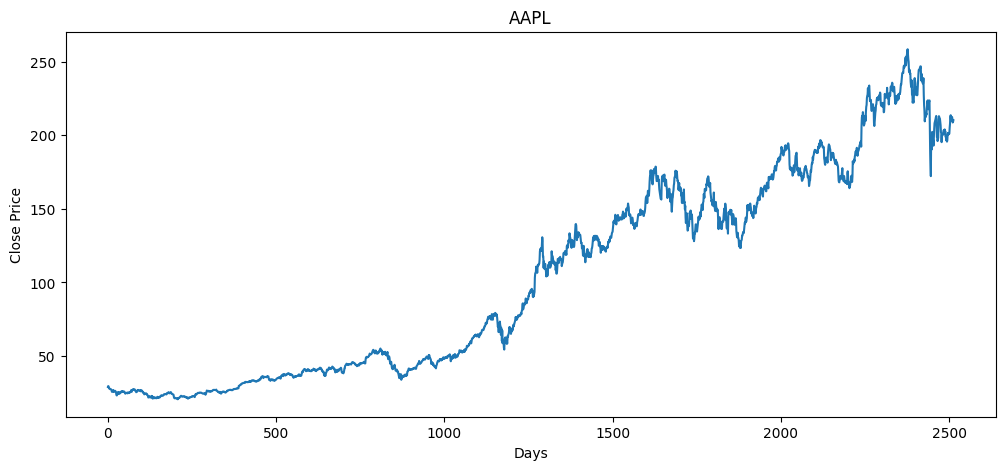

In [227]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title(ticker)

In [228]:
df['MA_100'] = df.Close.rolling(100).mean()

In [229]:
df['MA_100'].head(103)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
98           NaN
99     26.045420
100    26.022247
101    25.987690
102    25.957332
Name: MA_100, Length: 103, dtype: float64

In [230]:
df

Price       Date       Close        High         Low        Open     Volume  \
0     2015-07-17   29.030582   29.030582   28.737186   28.909642  184658800   
1     2015-07-20   29.579300   29.780869   29.272463   29.332935  235600800   
2     2015-07-21   29.283665   29.769672   29.187361   29.753996  307025600   
3     2015-07-22   28.045130   28.107840   27.321716   27.321716  461802400   
4     2015-07-23   28.031683   28.463937   28.009285   28.264607  203998000   
...          ...         ...         ...         ...         ...        ...   
2509  2025-07-10  212.410004  213.479996  210.029999  210.509995   44443600   
2510  2025-07-11  211.160004  212.130005  209.860001  210.570007   39765800   
2511  2025-07-14  208.619995  210.910004  207.539993  209.929993   38840100   
2512  2025-07-15  209.110001  211.889999  208.919998  209.220001   42296300   
2513  2025-07-16  210.160004  212.399994  208.639999  210.300003   47429600   

Price      MA_100  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
2509   210.972337  
2510   210.641140  
2511   210.285842  
2512   209.931449  
2513   209.577968  

[2514 rows x 7 columns]

Text(0.5, 1.0, '100 Days Moving Average')

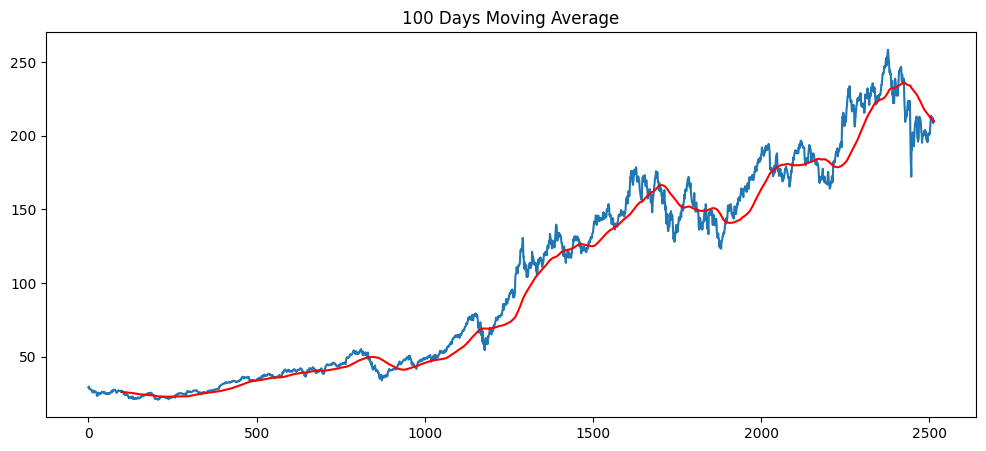

In [231]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.title('100 Days Moving Average')

In [232]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price       Close  Percentage Changed
0       29.030582                 NaN
1       29.579300            0.018901
2       29.283665           -0.009995
3       28.045130           -0.042294
4       28.031683           -0.000479
...           ...                 ...
2509   212.410004            0.006015
2510   211.160004           -0.005885
2511   208.619995           -0.012029
2512   209.110001            0.002349
2513   210.160004            0.005021

[2514 rows x 2 columns]

In [233]:
df

Price       Date       Close        High         Low        Open     Volume  \
0     2015-07-17   29.030582   29.030582   28.737186   28.909642  184658800   
1     2015-07-20   29.579300   29.780869   29.272463   29.332935  235600800   
2     2015-07-21   29.283665   29.769672   29.187361   29.753996  307025600   
3     2015-07-22   28.045130   28.107840   27.321716   27.321716  461802400   
4     2015-07-23   28.031683   28.463937   28.009285   28.264607  203998000   
...          ...         ...         ...         ...         ...        ...   
2509  2025-07-10  212.410004  213.479996  210.029999  210.509995   44443600   
2510  2025-07-11  211.160004  212.130005  209.860001  210.570007   39765800   
2511  2025-07-14  208.619995  210.910004  207.539993  209.929993   38840100   
2512  2025-07-15  209.110001  211.889999  208.919998  209.220001   42296300   
2513  2025-07-16  210.160004  212.399994  208.639999  210.300003   47429600   

Price      MA_100  Percentage Changed  
0             NaN                 NaN  
1             NaN            0.018901  
2             NaN           -0.009995  
3             NaN           -0.042294  
4             NaN           -0.000479  
...           ...                 ...  
2509   210.972337            0.006015  
2510   210.641140           -0.005885  
2511   210.285842           -0.012029  
2512   209.931449            0.002349  
2513   209.577968            0.005021  

[2514 rows x 8 columns]

In [234]:
df['MA_200'] = df.Close.rolling(200).mean()
df['MA_200']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2509    222.487793
2510    222.406590
2511    222.321306
2512    222.233988
2513    222.156903
Name: MA_200, Length: 2514, dtype: float64

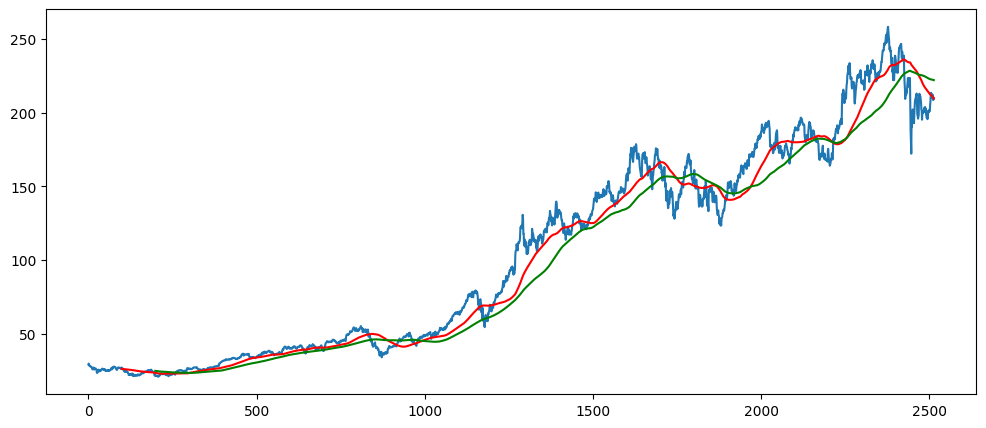

In [235]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r') # 'r' for red color
plt.plot(df['MA_200'], 'g') # 'r' for red color

In [236]:
df.shape

(2514, 9)

In [237]:
df

Price       Date       Close        High         Low        Open     Volume  \
0     2015-07-17   29.030582   29.030582   28.737186   28.909642  184658800   
1     2015-07-20   29.579300   29.780869   29.272463   29.332935  235600800   
2     2015-07-21   29.283665   29.769672   29.187361   29.753996  307025600   
3     2015-07-22   28.045130   28.107840   27.321716   27.321716  461802400   
4     2015-07-23   28.031683   28.463937   28.009285   28.264607  203998000   
...          ...         ...         ...         ...         ...        ...   
2509  2025-07-10  212.410004  213.479996  210.029999  210.509995   44443600   
2510  2025-07-11  211.160004  212.130005  209.860001  210.570007   39765800   
2511  2025-07-14  208.619995  210.910004  207.539993  209.929993   38840100   
2512  2025-07-15  209.110001  211.889999  208.919998  209.220001   42296300   
2513  2025-07-16  210.160004  212.399994  208.639999  210.300003   47429600   

Price      MA_100  Percentage Changed      MA_200  
0             NaN                 NaN         NaN  
1             NaN            0.018901         NaN  
2             NaN           -0.009995         NaN  
3             NaN           -0.042294         NaN  
4             NaN           -0.000479         NaN  
...           ...                 ...         ...  
2509   210.972337            0.006015  222.487793  
2510   210.641140           -0.005885  222.406590  
2511   210.285842           -0.012029  222.321306  
2512   209.931449            0.002349  222.233988  
2513   209.577968            0.005021  222.156903  

[2514 rows x 9 columns]

In [239]:
# Splitting data into Training and Testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1759, 1)
(755, 1)


In [241]:
data_training.tail(100)

Close
1659  169.576279
1660  165.969513
1661  164.416763
1662  161.488144
1663  157.311386
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[100 rows x 1 columns]

In [242]:
data_testing.tail(100)

Close
2414  245.228424
2415  246.776398
2416  246.716461
2417  240.045212
2418  236.989227
...          ...
2509  212.410004
2510  211.160004
2511  208.619995
2512  209.110001
2513  210.160004

[100 rows x 1 columns]

In [145]:
data_training

Close
0      29.030577
1      29.579294
2      29.283661
3      28.045132
4      28.031693
...          ...
1754  140.663330
1755  144.039139
1756  144.718231
1757  142.582489
1758  143.556839

[1759 rows x 1 columns]

In [243]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [249]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05305841],
       [0.05653135],
       [0.05466022],
       ...,
       [0.78526706],
       [0.77174974],
       [0.77791668]])

In [250]:
data_training_array.shape

(1759, 1)

In [251]:
print(data_training_array)

[[0.05305841]
 [0.05653135]
 [0.05466022]
 ...
 [0.78526706]
 [0.77174974]
 [0.77791668]]


In [252]:
type(data_training_array)

numpy.ndarray

In [253]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    print(data_training_array[i-100: i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

[[0.05305841]
 [0.05653135]
 [0.05466022]
 [0.0468213 ]
 [0.04673619]
 [0.04580068]
 [0.04334835]
 [0.04421303]
 [0.0436602 ]
 [0.04278136]
 [0.04126455]
 [0.03721043]
 [0.03182383]
 [0.03290117]
 [0.03325714]
 [0.03381247]
 [0.03979305]
 [0.03092185]
 [0.03341376]
 [0.03328561]
 [0.034439  ]
 [0.03614775]
 [0.03520797]
 [0.0330863 ]
 [0.02972576]
 [0.01991482]
 [0.01615555]
 [0.01703838]
 [0.02551088]
 [0.0301102 ]
 [0.03063707]
 [0.0298824 ]
 [0.02270574]
 [0.02928427]
 [0.02647916]
 [0.02491284]
 [0.02924163]
 [0.02616591]
 [0.02961183]
 [0.03194712]
 [0.03351347]
 [0.03489464]
 [0.03507977]
 [0.03153417]
 [0.03086491]
 [0.03337104]
 [0.03079371]
 [0.03210375]
 [0.03307203]
 [0.03265909]
 [0.02942673]
 [0.0246138 ]
 [0.02637953]
 [0.02535429]
 [0.02649343]
 [0.02706301]
 [0.02781768]
 [0.02706301]
 [0.0252403 ]
 [0.02897105]
 [0.02823062]
 [0.02850116]
 [0.0262513 ]
 [0.02860085]
 [0.02743318]
 [0.02841574]
 [0.03132057]
 [0.03130635]
 [0.03378401]
 [0.03888171]
 [0.03347071]
 [0.03

In [255]:
print(y_train)

[0.038392   0.03465962 0.03544612 ... 0.78526706 0.77174974 0.77791668]


In [256]:
x_train.shape


(1659, 100, 1)

In [257]:
x_train.ndim

3

In [258]:
y_train.shape

(1659,)

In [259]:
!pip install tensorflow

In [260]:
import tensorflow as tf


In [261]:
# ML Model
from keras.layers import Dense, LSTM, Input
from keras.models import Sequential

In [263]:
model = Sequential()

# Input layer defines the shape of the data the model will receive
# (100, 1) means each input sample is a sequence of 100 time steps, 
# with 1 feature at each time step (e.g., stock closing price)
model.add(Input(shape=(100, 1)))

# First LSTM layer with 128 units, tanh activation function. Tann means Hyperbolic Tangent, this helps the network handle
# both positive and negative values, which is important when you're trying to capture patterns in sequential data.
# We also set return_sequences=True because we want this layer to return the full sequence to the next LSTM layer.
# For example, if you have a sequence of 100 time steps, and you set return_sequences=True, the LSTM layer will produce 
# an output for each of those 100 steps
model.add(LSTM(units=128, activation='tanh', return_sequences=True))

# No return_sequences means this layer outputs a single value summarizing the sequence
# Now at this point, we got the single value summarizing the sequence of output that was generated in the previous layer
model.add(LSTM(units=64))

# A Dense layer is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer. 
# These layers are typically used at the end of a neural network to transform the learned features into the final output.
model.add(Dense(25))
model.add(Dense(1))

In [264]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0494
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.5825e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 6.1227e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 4.9659e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.6967e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.2628e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.9983e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.2176e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.1617e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.9688e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.5170e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.7038e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.8116e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.2313e-04
Epoch 15/50
52/52 ━

In [265]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [268]:
data_training.tail(100)

Close
1659  169.576279
1660  165.969513
1661  164.416763
1662  161.488144
1663  157.311386
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[100 rows x 1 columns]

In [269]:
data_testing

Close
1759  143.192734
1760  146.125656
1761  147.798828
1762  144.747757
1763  148.615707
...          ...
2509  212.410004
2510  211.160004
2511  208.619995
2512  209.110001
2513  210.160004

[755 rows x 1 columns]

In [270]:
past_100_days = data_training.tail(100)

In [271]:
past_100_days.head(100)

Close
1659  169.576279
1660  165.969513
1661  164.416763
1662  161.488144
1663  157.311386
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[100 rows x 1 columns]

In [272]:
type(past_100_days)

pandas.core.frame.DataFrame

In [273]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [274]:
final_df.head()

Close
0  169.576279
1  165.969513
2  164.416763
3  161.488144
4  157.311386

In [276]:
final_df.tail(100)

Close
755  245.228424
756  246.776398
757  246.716461
758  240.045212
759  236.989227
..          ...
850  212.410004
851  211.160004
852  208.619995
853  209.110001
854  210.160004

[100 rows x 1 columns]

In [277]:
input_data = scaler.fit_transform(final_df)

In [278]:
input_data.shape

(855, 1)

In [279]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [280]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [281]:
x_test.ndim

3

In [282]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [283]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [284]:
print(y_predicted)

[144.03418  143.91577  144.7007   146.0949   146.16977  147.14561
 148.78592  150.90622  151.98685  151.93025  151.03651  152.05038
 153.4982   156.50926  158.5461   158.9383   161.023    162.65334
 163.41138  163.40305  163.18011  164.71361  165.85056  167.93686
 169.91217  170.97517  171.9664   172.316    171.20172  168.50749
 166.40565  165.46837  166.30423  164.7563   162.36311  159.73657
 157.43454  156.39227  155.32553  154.21155  154.02623  153.63795
 154.39641  157.48741  156.529    155.25449  153.21118  151.07118
 151.01013  152.4904   152.81403  152.33746  150.9518   149.89519
 149.64668  149.06586  146.0758   142.02383  140.35641  141.14093
 142.64383  143.62772  142.36128  140.87251  139.30115  137.98846
 138.62     138.2715   138.9819   140.25876  141.36336  141.89058
 143.30925  145.27962  147.76581  148.51491  146.84244  148.74174
 150.26978  150.21074  147.71867  143.32983  139.81787  137.88712
 137.28043  135.93436  138.4943   142.6493   145.62227  147.77109
 148.40096

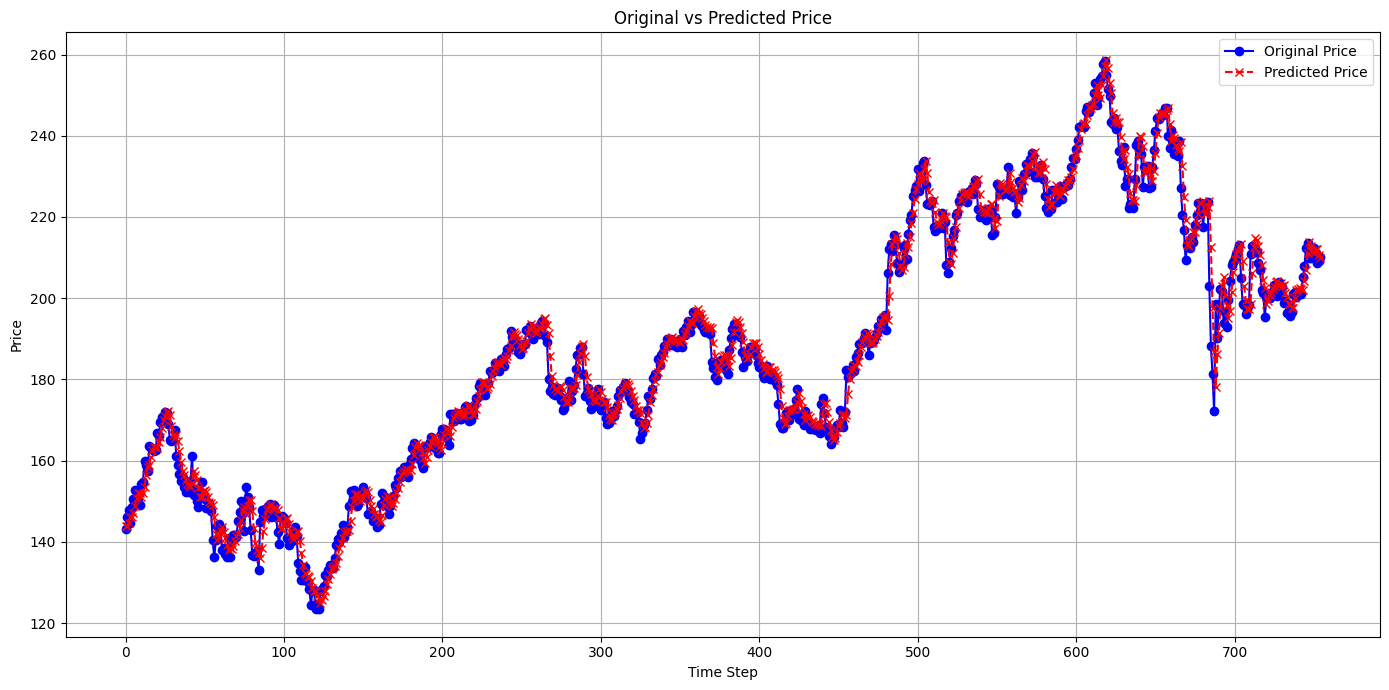

In [288]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Original Price', marker='o', linestyle='-')
plt.plot(y_predicted, color='red', label='Predicted Price', marker='x', linestyle='--')
plt.title("Original vs Predicted Price")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
# MSE
mse = np.mean((y_test - y_predicted) ** 2)
mse

np.float64(12.097021653665236)

In [69]:
# RMSE
rmse = np.sqrt(mse)
rmse

np.float64(3.478077292652542)

In [70]:
# R-Squared
# Calculate SSR (Sum of Squared Residuals)
ssr = np.sum((y_test - y_predicted) ** 2)

# Calculate SST (Total Sum of Squares)
sst = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)
r_squared

np.float64(0.9876709562224227)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 12.097021653665236


In [73]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.478077292652542


In [74]:
r2 = r2_score(y_test, y_predicted)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9876709562224227


In [289]:
data_training.tail(100)

Close
1659  169.576279
1660  165.969513
1661  164.416763
1662  161.488144
1663  157.311386
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[100 rows x 1 columns]

In [295]:
data_training.tail(300)

Close
1459  124.904282
1460  125.148514
1461  126.750740
1462  127.425972
1463  124.137817
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[300 rows x 1 columns]

In [302]:
past_200_days_training = data_training.tail(200)
past_200_days_training

Close
1559  143.994125
1560  142.474976
1561  139.083878
1562  139.985565
1563  138.682037
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[200 rows x 1 columns]

In [303]:
data_testing

Close
1759  143.192734
1760  146.125656
1761  147.798828
1762  144.747757
1763  148.615707
...          ...
2509  212.410004
2510  211.160004
2511  208.619995
2512  209.110001
2513  210.160004

[755 rows x 1 columns]

In [304]:
past_200_days_testing = data_testing.tail(200)
past_200_days_testing

Close
2314  226.723038
2315  226.992081
2316  232.183838
2317  225.417648
2318  225.985641
...          ...
2509  212.410004
2510  211.160004
2511  208.619995
2512  209.110001
2513  210.160004

[200 rows x 1 columns]

In [305]:
Myfinal_df = pd.concat([past_200_days_training, past_200_days_testing], ignore_index=True)

In [306]:
Myfinal_df 

Close
0    143.994125
1    142.474976
2    139.083878
3    139.985565
4    138.682037
..          ...
395  212.410004
396  211.160004
397  208.619995
398  209.110001
399  210.160004

[400 rows x 1 columns]

In [308]:
Myfinal_df.head()

Close
0  143.994125
1  142.474976
2  139.083878
3  139.985565
4  138.682037

In [311]:
input_data_Ivan = scaler.fit_transform(Myfinal_df)

In [312]:
input_data_Ivan.shape

(400, 1)

In [313]:
x_test = []
y_test = []

for i in range(100, input_data_Ivan.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [314]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(300, 100, 1)
(300,)


In [315]:
x_test.ndim

3

In [316]:
y_predicted = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [317]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [318]:
print(y_predicted)

[168.12978 169.20775 168.51518 167.00081 164.67792 161.41925 160.16968
 160.7565  161.82092 161.93811 163.01678 163.81342 163.01299 160.558
 157.85571 158.08368 157.4753  155.5311  152.48521 151.73705 153.51828
 155.91861 158.94563 161.59834 164.42537 166.70242 169.39787 171.33017
 172.55405 174.43083 175.16093 173.91667 172.55475 173.48462 173.2613
 171.55562 170.34045 168.94066 166.36739 165.3038  166.16994 165.27321
 164.18636 164.35321 164.73529 164.71622 162.78435 161.45895 158.51044
 156.1489  157.36931 157.07687 156.60526 156.79475 159.51927 158.5932
 157.18814 154.23419 152.73956 149.45235 145.54199 144.19702 143.60791
 144.67914 143.32437 140.56401 138.26807 138.42413 138.56613 138.72055
 139.81494 142.7383  145.17073 146.58513 147.97203 146.90175 145.61443
 145.4843  145.52934 143.929   140.64606 136.36671 133.33656 132.32545
 130.87085 130.08891 130.94719 132.0726  133.81317 136.2805  138.29529
 138.23196 137.94421 136.88521 136.50798 137.25197 138.59828 140.83168
 142.93785

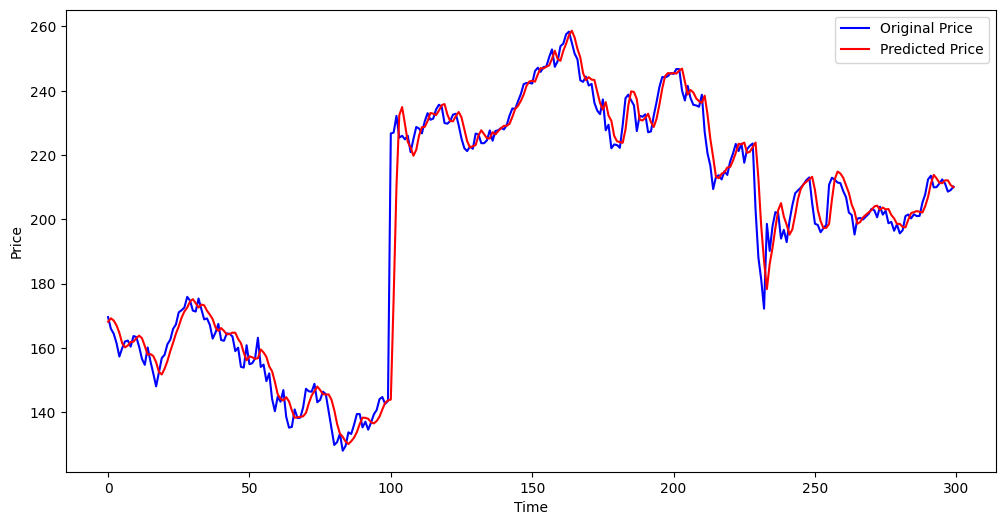

In [319]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
# plt.xlim(500, 700)
# plt.ylim(10, 25)
plt.show()

In [368]:
data_training

Close
0      29.030582
1      29.579300
2      29.283665
3      28.045130
4      28.031683
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[1759 rows x 1 columns]

In [457]:
data_training

Close
0      29.030582
1      29.579300
2      29.283665
3      28.045130
4      28.031683
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[1759 rows x 1 columns]

In [503]:
past_700_days_testing=data_training.tail(700)

In [504]:
past_700_days_testing

Close
1059   54.140469
1060   52.783283
1061   53.231678
1062   54.723843
1063   54.735909
...          ...
1754  140.663300
1755  144.039169
1756  144.718216
1757  142.582504
1758  143.556870

[700 rows x 1 columns]

In [505]:
past_700_days_testing.shape

(700, 1)

In [506]:
last_700_values = past_700_days_testing.tail(700).values 

In [507]:
last_700_values.shape

(700, 1)

In [508]:
scaled_last_700 = scaler.transform(last_700_values)

C:\Users\Ivan\miniconda3\envs\stock-py312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [509]:
scaled_last_700 .shape

(700, 1)

In [510]:
input_seq = scaled_last_700.reshape(1, 700, 1)

In [511]:
input_seq.shape

(1, 700, 1)

In [512]:
future_predictions = []

for _ in range(700):  # change this to how many days you want to predict
    prediction = model.predict(input_seq, verbose=0)
    predicted_value = prediction[0, 0]
    future_predictions.append(predicted_value)

    # update input_seq: remove first, add predicted at the end
    predicted_reshaped = np.array([[[predicted_value]]]) 
    input_seq = np.append(input_seq[:, 1:, :], predicted_reshaped, axis=1)

In [513]:
future_predictions

[np.float32(0.122192636),
 np.float32(0.12344898),
 np.float32(0.12426826),
 np.float32(0.124919415),
 np.float32(0.12554497),
 np.float32(0.12622292),
 np.float32(0.12699185),
 np.float32(0.12786463),
 np.float32(0.12883776),
 np.float32(0.12989844),
 np.float32(0.1310295),
 np.float32(0.13221322),
 np.float32(0.13343339),
 np.float32(0.13467677),
 np.float32(0.13593343),
 np.float32(0.13719675),
 np.float32(0.13846298),
 np.float32(0.13973059),
 np.float32(0.1409998),
 np.float32(0.1422718),
 np.float32(0.1435484),
 np.float32(0.1448315),
 np.float32(0.14612295),
 np.float32(0.14742434),
 np.float32(0.14873682),
 np.float32(0.15006123),
 np.float32(0.15139808),
 np.float32(0.15274754),
 np.float32(0.15410961),
 np.float32(0.15548411),
 np.float32(0.15687078),
 np.float32(0.15826938),
 np.float32(0.15967959),
 np.float32(0.16110118),
 np.float32(0.16253395),
 np.float32(0.16397774),
 np.float32(0.1654325),
 np.float32(0.16689813),
 np.float32(0.1683747),
 np.float32(0.16986218),
 np.f

In [515]:
My_predicted = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [516]:
My_predicted

array([143.9391 , 144.10292, 144.20976, 144.29466, 144.37624, 144.46463,
       144.56488, 144.67868, 144.80557, 144.94388, 145.09135, 145.2457 ,
       145.40479, 145.56693, 145.73077, 145.89551, 146.06061, 146.22589,
       146.39139, 146.55724, 146.7237 , 146.891  , 147.05939, 147.22908,
       147.40022, 147.5729 , 147.74721, 147.92317, 148.10077, 148.28   ,
       148.46082, 148.64317, 148.82706, 149.0124 , 149.19923, 149.38748,
       149.57716, 149.76828, 149.9608 , 150.15475, 150.35016, 150.547  ,
       150.7453 , 150.94508, 151.14635, 151.34914, 151.55344, 151.7593 ,
       151.9667 , 152.17567, 152.38625, 152.59842, 152.81223, 153.02765,
       153.24475, 153.46352, 153.68398, 153.90614, 154.13005, 154.35568,
       154.58308, 154.81227, 155.04326, 155.27608, 155.51073, 155.74722,
       155.98561, 156.2259 , 156.46811, 156.71225, 156.95834, 157.20642,
       157.4565 , 157.70859, 157.96272, 158.21893, 158.4772 , 158.7376 ,
       159.00012, 159.26479, 159.5316 , 159.80061, 

In [517]:
type(My_predicted)

numpy.ndarray

In [518]:
type(past_100_days)

pandas.core.frame.DataFrame

In [519]:
df_predicted = pd.DataFrame(My_predicted, columns=['Predicted_Price'])

In [520]:
df_predicted

Predicted_Price
0         143.939102
1         144.102921
2         144.209763
3         144.294662
4         144.376236
..               ...
695       272.331360
696       272.331360
697       272.331390
698       272.331421
699       272.331421

[700 rows x 1 columns]

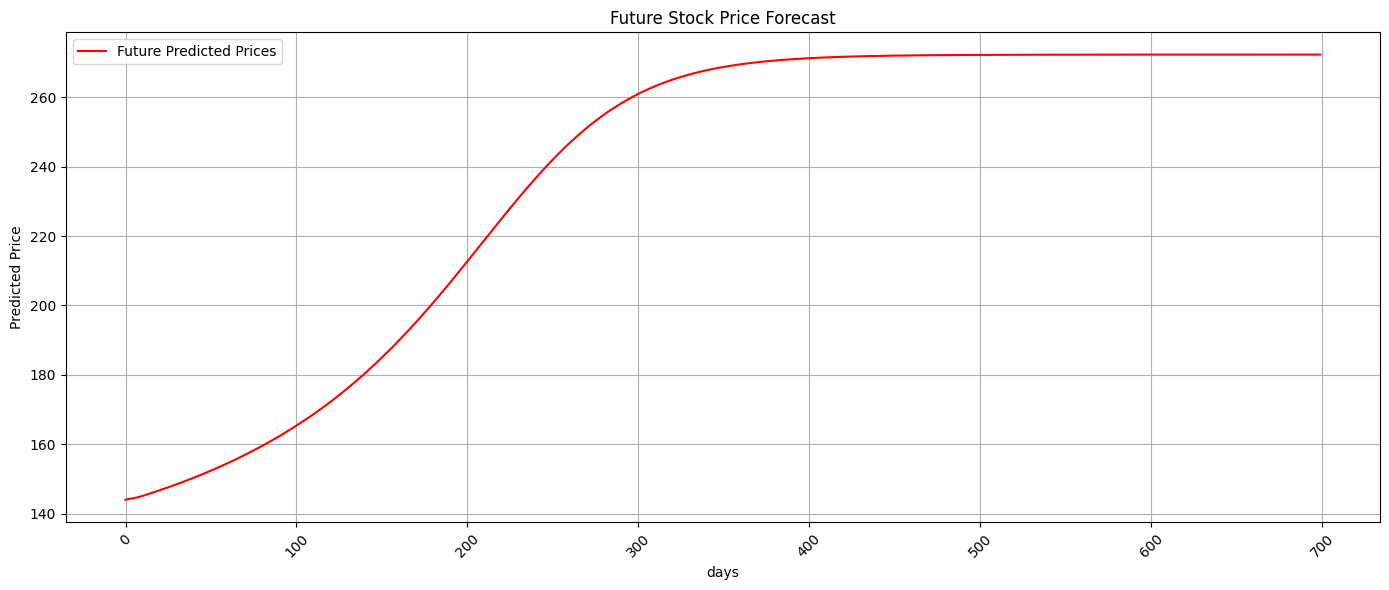

In [521]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot the predicted prices
plt.plot(df_predicted.index, df_predicted['Predicted_Price'], color='red', label='Future Predicted Prices')

plt.title("Future Stock Price Forecast")
plt.xlabel("days")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
